<a href="https://colab.research.google.com/github/ManishaKakkireni/Brain-tumor-detection/blob/main/Brain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import urllib
import zipfile

# Download and unzip the dataset
if not os.path.isfile('.zip'):
  urllib.request.urlretrieve("https://github.com/Gurupatil0003/Brain-Tumor-Data-Set/archive/refs/heads/main.zip", "Cat Dog Data Set.zip")

zip_filename = "Cat_Dog_Dataset.zip"
with zipfile.ZipFile("Cat Dog Data Set.zip","r") as zip_ref:
    zip_ref.extractall(".")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_path = "/content/Brain-Tumor-Data-Set-main/Brain Tumor Data Set/Train"
test_path = "/content/Brain-Tumor-Data-Set-main/Brain Tumor Data Set/Test"

In [ ]:
IMG_SIZE = 64
BATCH_SIZE = 32

In [ ]:
#next rescaling the data
Train_data = ImageDataGenerator(rescale = 1./255).flow_from_directory(
    train_path,
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'binary',
    shuffle = True
)
Test_data = ImageDataGenerator(rescale = 1./255).flow_from_directory(
    train_path,
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'binary',
    shuffle = True
)

Found 3903 images belonging to 2 classes.
Found 3903 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer = "adam", loss = 'binary_crossentropy',metrics = ["accuracy"])

In [ ]:
model.fit(Train_data, epochs = 3, validation_data = Test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
122/122 ━━━━━━━━━━━━━━━━━━━━ 40s 313ms/step - accuracy: 0.6256 - loss: 0.6516 - val_accuracy: 0.7625 - val_loss: 0.4790
Epoch 2/3
122/122 ━━━━━━━━━━━━━━━━━━━━ 38s 313ms/step - accuracy: 0.8220 - loss: 0.3868 - val_accuracy: 0.8880 - val_loss: 0.2628
Epoch 3/3
122/122 ━━━━━━━━━━━━━━━━━━━━ 38s 313ms/step - accuracy: 0.8970 - loss: 0.2510 - val_accuracy: 0.9493 - val_loss: 0.1671


Saving e1253b3a-7f01-4764-b794-ff4a26158cb0.jpeg to e1253b3a-7f01-4764-b794-ff4a26158cb0.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


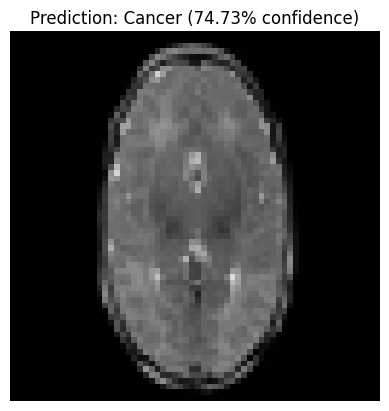

In [ ]:
# Upload and Predict

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io

uploaded = files.upload()

for file_name in uploaded.keys():
    img_path = file_name
    img = Image.open(img_path).resize((IMG_SIZE, IMG_SIZE))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediction
    prediction = model.predict(img_array)[0][0]
    label = "Cancer" if prediction > 0.5 else "Not Cancer"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    # Show Result
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {label} ({confidence:.2%} confidence)")
    plt.show()
